In [1]:
import pandas as pd
import matplotlib.pyplot as plt

C:\Users\baps\AppData\Local\Temp\ipykernel_13108\1492400551.py:1: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


In [2]:
from sklearn.tree import DecisionTreeClassifier
df=pd.read_csv("csv/titanic.csv")
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [3]:
df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [4]:
for i in df.columns:
   print(i," - ",df[i].isnull().sum())

PassengerId  -  0
Survived  -  0
Pclass  -  0
Name  -  0
Sex  -  0
Age  -  177
SibSp  -  0
Parch  -  0
Ticket  -  0
Fare  -  0
Cabin  -  687
Embarked  -  2


In [5]:
df.duplicated().sum()

0

## preprocessing

### cleaning

In [6]:
ageMedian=df.Age.median()
cleanData=df.drop(columns=["PassengerId","Name","SibSp","Parch","Ticket","Cabin","Embarked"])
cleanData.Age=df.Age.fillna(ageMedian)
cleanData

,Survived,Pclass,Sex,Age,Fare
0,0,3,male,22.0,7.2500
1,1,1,female,38.0,71.2833
2,1,3,female,26.0,7.9250
3,1,1,female,35.0,53.1000
4,0,3,male,35.0,8.0500
...,...,...,...,...,...
886,0,2,male,27.0,13.0000
887,1,1,female,19.0,30.0000
888,0,3,female,28.0,23.4500
889,1,1,male,26.0,30.0000


### make it usefull (convert male in catagory)

In [7]:
cleanData.head()

,Survived,Pclass,Sex,Age,Fare
0,0,3,male,22.0,7.2500
1,1,1,female,38.0,71.2833
2,1,3,female,26.0,7.9250
3,1,1,female,35.0,53.1000
4,0,3,male,35.0,8.0500


In [8]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
cleanData["sexLable"]=le.fit_transform(cleanData.Sex)

In [10]:
cleanData.head()

,Survived,Pclass,Sex,Age,Fare,sexLable
0,0,3,male,22.0,7.2500,1
1,1,1,female,38.0,71.2833,0
2,1,3,female,26.0,7.9250,0
3,1,1,female,35.0,53.1000,0
4,0,3,male,35.0,8.0500,1


#### train test spliting

In [11]:
from sklearn.model_selection import train_test_split


x_train,x_test,y_train,y_test=train_test_split(cleanData.drop(columns=["Survived","Sex"]),cleanData["Survived"],train_size=.2)

In [12]:
model=DecisionTreeClassifier()
model.fit(x_train,y_train)

DecisionTreeClassifier()

In [13]:
y_pred=model.predict(x_test)
model.score(x_test,y_test)

0.7405329593267882

In [14]:
from sklearn.metrics import confusion_matrix


cm=confusion_matrix(y_test,y_pred)

<Axes: >

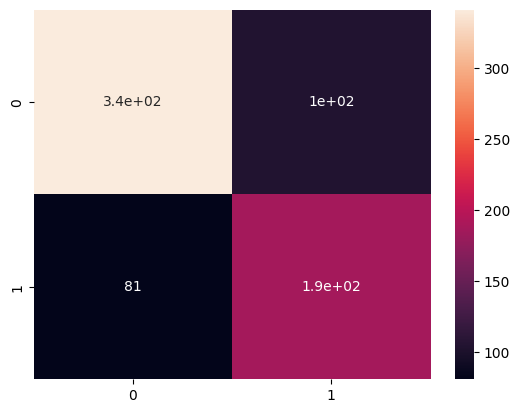

In [15]:
from seaborn import heatmap
heatmap(cm,annot=True)